In [2]:
from obspy.core import read
import numpy as np
import pandas as pd
# from mtspec import mtspec
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,minimize
import glob
%matplotlib inline
from scipy import signal

from obspy import UTCDateTime
from obspy import Stream

from ftplib import FTP

import sys
import os

# from scipy.integrate import simps

# sys.path.append('/Users/ab14785/OneDrive - University of Bristol/1-Coding/x-reference_code')

# import ant_functions as ant

In [3]:
from ISpy.detect import trigger
from obspy.core import read

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Read in datafile and apply some preprocessing

st=read('data/2019-08-23-2220-39S.BLAC__069')
st=st.select(network='CU',channel='HH*')
st.detrend(type='linear')
# st.taper(type='hann',max_percentage=0.1)
st.filter('bandpass',freqmin=3,freqmax=50)

24 Trace(s) in Stream:

CU.PNR01.--.HHE | 2019-08-23T22:20:39.000000Z - 2019-08-23T22:23:15.995000Z | 200.0 Hz, 31400 samples
...
(22 other traces)
...
CU.PNR3B.--.HHZ | 2019-08-23T22:20:39.000000Z - 2019-08-23T22:23:15.995000Z | 200.0 Hz, 31400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [5]:
stations=['PNR01','PNR02','PNR3A','PNR3B','PNR04','PNR05','PNR06','PNR07']

In [6]:
stations=['PNR01']

In [11]:
trigger.iscoin(st,stations,channel='HHE',on=1,off=0.5,minsta=3,window=5)

20190823222210
data/20190823222210/SAC/CU.PNR01.20190823222210.HHE.sac
CU.PNR01.20190823222210.HHE.sac
2.16
data/20190823222210/SAC/CU.PNR01.20190823222210.HHE.sac
data/20190823222210/SAC/CU.PNR01.20190823222210.HHN.sac
CU.PNR01.20190823222210.HHN.sac
2.145
data/20190823222210/SAC/CU.PNR01.20190823222210.HHN.sac
data/20190823222210/SAC/CU.PNR01.20190823222210.HHZ.sac
CU.PNR01.20190823222210.HHZ.sac
1.565
data/20190823222210/SAC/CU.PNR01.20190823222210.HHZ.sac


In [206]:
from obspy.signal.trigger import coincidence_trigger
from obspy.signal.trigger import trigger_onset

In [220]:
def tr_write(tr,path,id,resp=False,freqmin=0.01,freqmax=50):
    """ Removes the instrument response, and exports data to a SAC format"""
    network=tr.stats.network
    if network=="":
        network="GB"    
    station=tr.stats.station
    channel=tr.stats.channel
    date=tr.stats.starttime
    
    tr.stats.location='00'
    
    if resp==True:
        resp_file='data/RESP/RESP.%s.%s.00.%s'%(network,station,channel)
        if not os.path.exists(resp_file):
#             resp_file='RESP/RESP.%s.%s..%s'%(network,station,channel)
#             if not os.path.exists(resp_file):
            print('Response file could not be found')            
            pass
        else:
#                 tr.taper(max_percentage=0.01,type='cosine')
            tr=tr.detrend(type='linear')
            pre_filt = (freqmin,freqmin+0.5,freqmax-0.5,freqmax)
            seedresp = {'filename': resp_file, 'date':date, 'units': 'DISP'} 
            tr.simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
    else:
        pass
    
    if network=="":
        network="xx"
        
    if not os.path.exists(path):
        os.makedirs(path)
        
    file="%s.%s.%s.%s.sac"%(network,station,id,channel)
    filename="%s%s"%(path,file)
    print(filename)
#     tr=tr.slice(tr.stats.starttime+30,tr.stats.starttime+90)
    tr.write(filename,format='SAC')
    
    return file

In [56]:
print(st[50].stats)

st2=st.select(network='CU',channel='HH*')

         network: CU
         station: PNR3A
        location: --
         channel: HHZ
       starttime: 2019-08-23T22:20:39.000000Z
         endtime: 2019-08-23T22:23:15.995000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 31400
           calib: 1.0
         _format: SEISAN
      processing: ["ObsPy 1.2.2: detrend(options={}::type='linear')", "ObsPy 1.2.2: taper(max_length=None::max_percentage=0.1::side='both'::type='hann')"]


In [68]:
# Read in datafile and apply some preprocessing

st=read('data/2019-08-23-2220-39S.BLAC__069')
st=st.select(network='CU',channel='HH*')
st.detrend(type='linear')
# st.taper(type='hann',max_percentage=0.1)
st.filter('bandpass',freqmin=3,freqmax=50)

24 Trace(s) in Stream:

CU.PNR01.--.HHE | 2019-08-23T22:20:39.000000Z - 2019-08-23T22:23:15.995000Z | 200.0 Hz, 31400 samples
...
(22 other traces)
...
CU.PNR3B.--.HHZ | 2019-08-23T22:20:39.000000Z - 2019-08-23T22:23:15.995000Z | 200.0 Hz, 31400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [ ]:
# Set parameters
df=st[1].stats.sampling_rate

/Users/antony/anaconda3/envs/py37/lib/python3.7/site-packages/obspy/imaging/util.py:275: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/Users/antony/anaconda3/envs/py37/lib/python3.7/site-packages/obspy/imaging/waveform.py:820: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


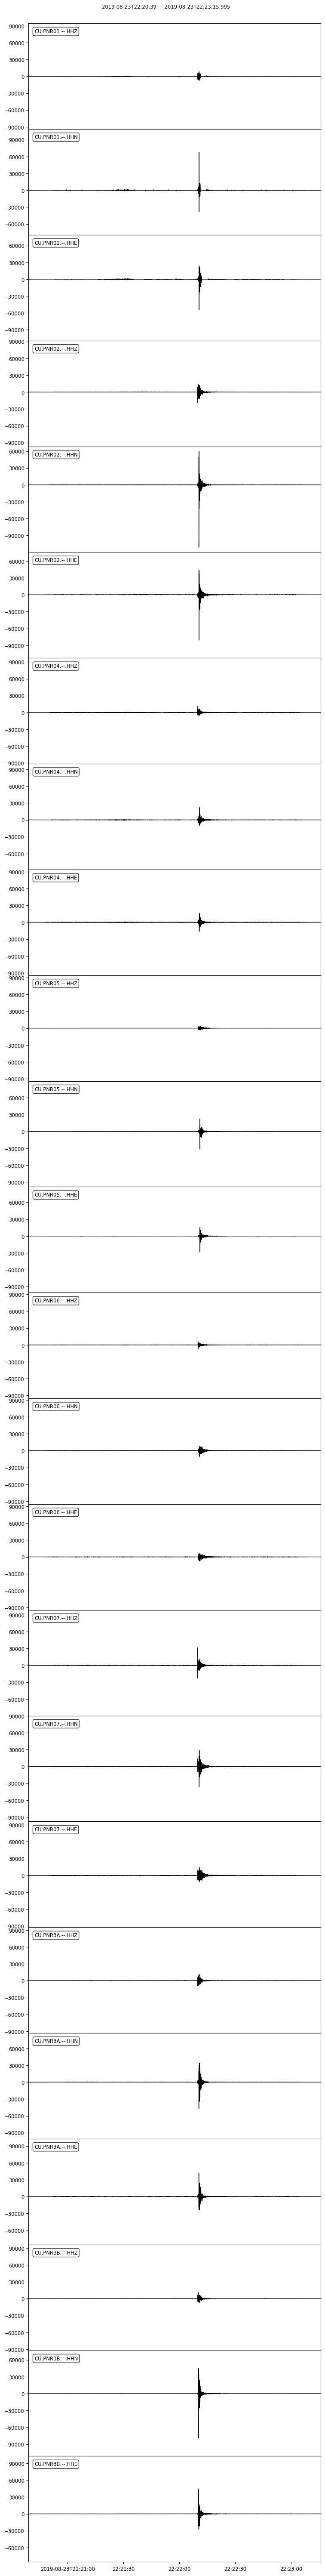

/Users/antony/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


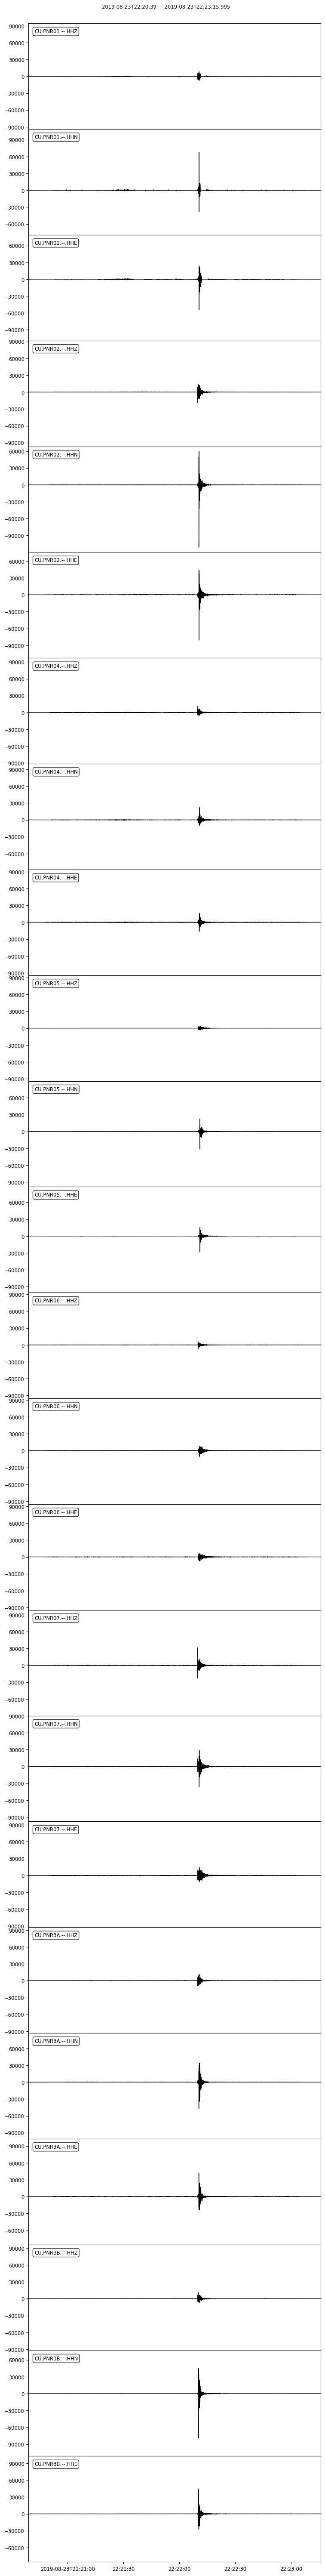

In [60]:
st.plot()

## Checking trigger

/Users/antony/anaconda3/envs/py37/lib/python3.7/site-packages/obspy/imaging/util.py:275: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/Users/antony/anaconda3/envs/py37/lib/python3.7/site-packages/obspy/imaging/waveform.py:820: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


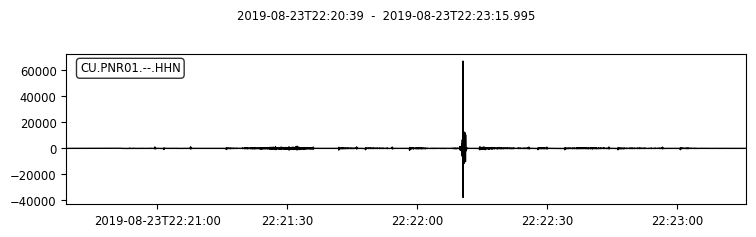

/Users/antony/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


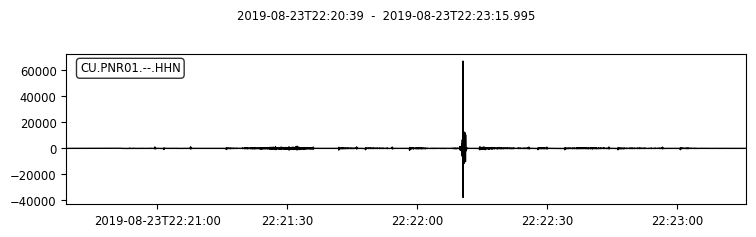

In [61]:
st[1].plot()

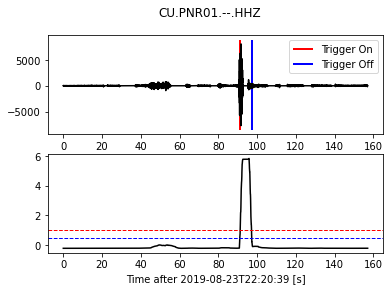

In [107]:
from obspy.signal.trigger import recursive_sta_lta
from obspy.signal.trigger import z_detect
from obspy.signal.trigger import plot_trigger
cft=recursive_sta_lta(st[1].data,int(1*df),int(10*df))
cft=z_detect(st[2].data,int(5*df))
plot_trigger(st[2],cft,1,0.5)

In [ ]:
stations=['PNR01','PNR02','PNR3A','PNR3B','PNR04','PNR05','PNR06','PNR07']

In [159]:
for tr in st:
    print(tr.stats.station)

PNR01
PNR01
PNR01
PNR02
PNR02
PNR02
PNR04
PNR04
PNR04
PNR05
PNR05
PNR05
PNR06
PNR06
PNR06
PNR07
PNR07
PNR07
PNR3A
PNR3A
PNR3A
PNR3B
PNR3B
PNR3B


## Create coincidence filter

In [161]:
st2=st.copy()
st2=st2.select(channel='HHE')
# trig=coincidence_trigger('recstalta',5,0.5,st2,3,sta=1,lta=10)
trig=coincidence_trigger('zdetect',1,0.5,st2,3,details=True,nsta=int(5*df))

In [162]:
trig_pd=pd.DataFrame(trig)
trig_pd

,time,stations,trace_ids,coincidence_sum,similarity,cft_peaks,cft_stds,duration,cft_peak_wmean,cft_std_wmean
0,2019-08-23T22:22:10.410000Z,"[PNR3B, PNR3A, PNR02, PNR06, PNR07, PNR01, PNR...","[CU.PNR3B.--.HHE, CU.PNR3A.--.HHE, CU.PNR02.--...",8.0,{},"[5.77821550565, 5.80954482569, 5.74728616344, ...","[1.4593125756, 1.56285830766, 1.52245548045, 1...",7.675,5.899249,1.605506


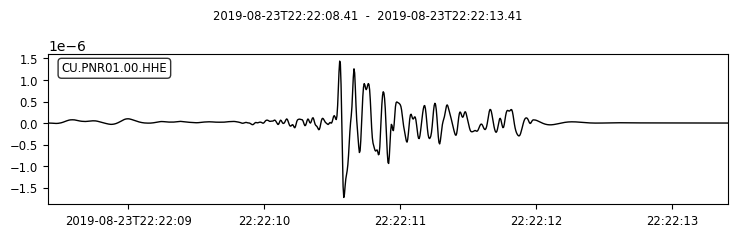

         network: CU
         station: PNR01
        location: 00
         channel: HHE
       starttime: 2019-08-23T22:22:08.410000Z
         endtime: 2019-08-23T22:22:13.410000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 1001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.0049999999, 'depmin': -1.7286558e-06, 'depmax': 1.4390677e-06, 'scale': 1.0, 'b': 0.0, 'e': 5.0, 'a': 1.4359099, 't0': 2.1600001, 'depmen': 1.3897143e-08, 'nzyear': 2019, 'nzjday': 235, 'nzhour': 22, 'nzmin': 22, 'nzsec': 8, 'nzmsec': 410, 'nvhdr': 6, 'npts': 1001, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'PNR01', 'khole': '00', 'ka': 'IPU0', 'kcmpnm': 'HHE', 'knetwk': 'CU'})

In [241]:
st4=read("%s%s"%(sacpath,'CU.PNR01.20190823222210.HHE.sac'))
st4.plot()
st4[0].stats

In [243]:
# stations=['PNR01','PNR02','PNR3A','PNR3B','PNR04','PNR05','PNR06','PNR07']

stations=['PNR01']

stime=st[0].stats.starttime

if len(trig_pd)>0:

    ttime=trig_pd.time[0]
    
    id=('%04d%02d%02d%02d%02d%02d'%(ttime.year,ttime.month,ttime.day,ttime.hour,ttime.minute,ttime.second))
    print(id)
    for station in stations:
        for channel in ('HHE','HHN','HHZ'):
            # Select the trace
            st2=st.copy()
            st2=st2.select(station=station)
            st2=st2.select(channel=channel)
           
            # Apply stalta to trace to identify pick times
            cft=z_detect(st2[0].data,int(5*df))
            list=trigger_onset(cft,0.3,0.2)
            onset_time=stime+list[0][0]/df
#             plot_trigger(st2[0],cft,1,0.5)

            # Slice the data in 5 second files
            st3=st2.copy()
            st3=st3.slice(ttime-2,ttime+3)
                      
            # Save SAC file
            sacpath='data/%s/SAC/'%(id)
            file=tr_write(st3[0],sacpath,id,resp=True,freqmin=0.01,freqmax=50)
            print(file)
            
            imgpath='data/%s/img/'%(id)
            if not os.path.exists(imgpath):
                os.makedirs(imgpath)
            
            fig=plt.figure(figsize=[10,3])
            plt.title('%s - %s'%(st3[0].stats.starttime,st3[0].stats.endtime))
            plt.plot(st3[0].times(),st3[0].data,'k')
            plt.axvline(x=onset_time-(ttime-2),color='r')
            plt.xlim(0,5)
            plt.xlabel('Time (s)')
            plt.savefig("%s%s.png"%(imgpath,file))
            plt.close(fig)
#             plt.show()
    
            # Read in again to include pick times
            st4=read("%s%s"%(sacpath,file))
            print(onset_time-(ttime-2))
            
            if channel=='HHZ':
                st4[0].stats.sac['ka']='IPU0'
                st4[0].stats.sac['a']=onset_time-(ttime-2)
                
            else:
                st4[0].stats.sac['kt0']='ISU0'
                st4[0].stats.sac['t0']=onset_time-(ttime-2)
                
            file=tr_write(st4[0],sacpath,id,resp=False,freqmin=0.01,freqmax=50)
#             st4.plot()
            
    

20190823222210
data/20190823222210/SAC/CU.PNR01.20190823222210.HHE.sac
CU.PNR01.20190823222210.HHE.sac
2.16
data/20190823222210/SAC/CU.PNR01.20190823222210.HHE.sac
data/20190823222210/SAC/CU.PNR01.20190823222210.HHN.sac
CU.PNR01.20190823222210.HHN.sac
2.145
data/20190823222210/SAC/CU.PNR01.20190823222210.HHN.sac
data/20190823222210/SAC/CU.PNR01.20190823222210.HHZ.sac
CU.PNR01.20190823222210.HHZ.sac
1.565
data/20190823222210/SAC/CU.PNR01.20190823222210.HHZ.sac


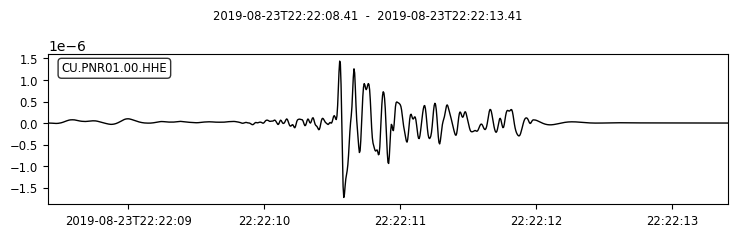

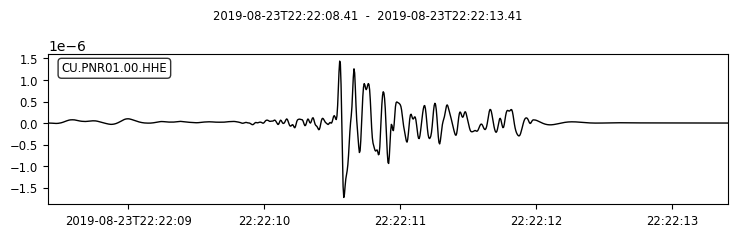

In [193]:
test=read('data/20190823222210/SAC/CU.PNR01.20190823222210.HHE.sac')
test.plot()

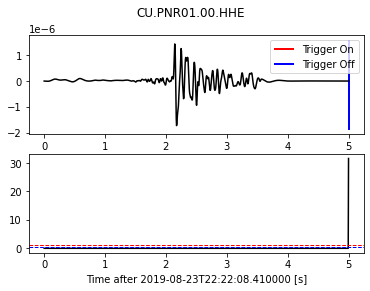

In [194]:
cft=z_detect(test[0].data,int(5*df))
plot_trigger(test[0],cft,1,0.5)

In [140]:
print(trig_pd.time[0]-st2[0].stats.starttime)

91.41


(85.0, 95.0)

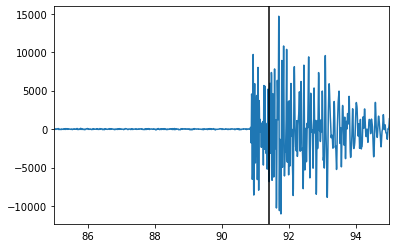

In [147]:
plt.plot(st2[5].times(),st2[5].data)
plt.axvline(x=trig_pd.time[0]-st2[0].stats.starttime,color='k')
plt.xlim(85,95)

In [157]:
print(np.max([trig_pd.time[0],trig_pd.time[0]+6]))

2019-08-23T22:22:16.410000Z


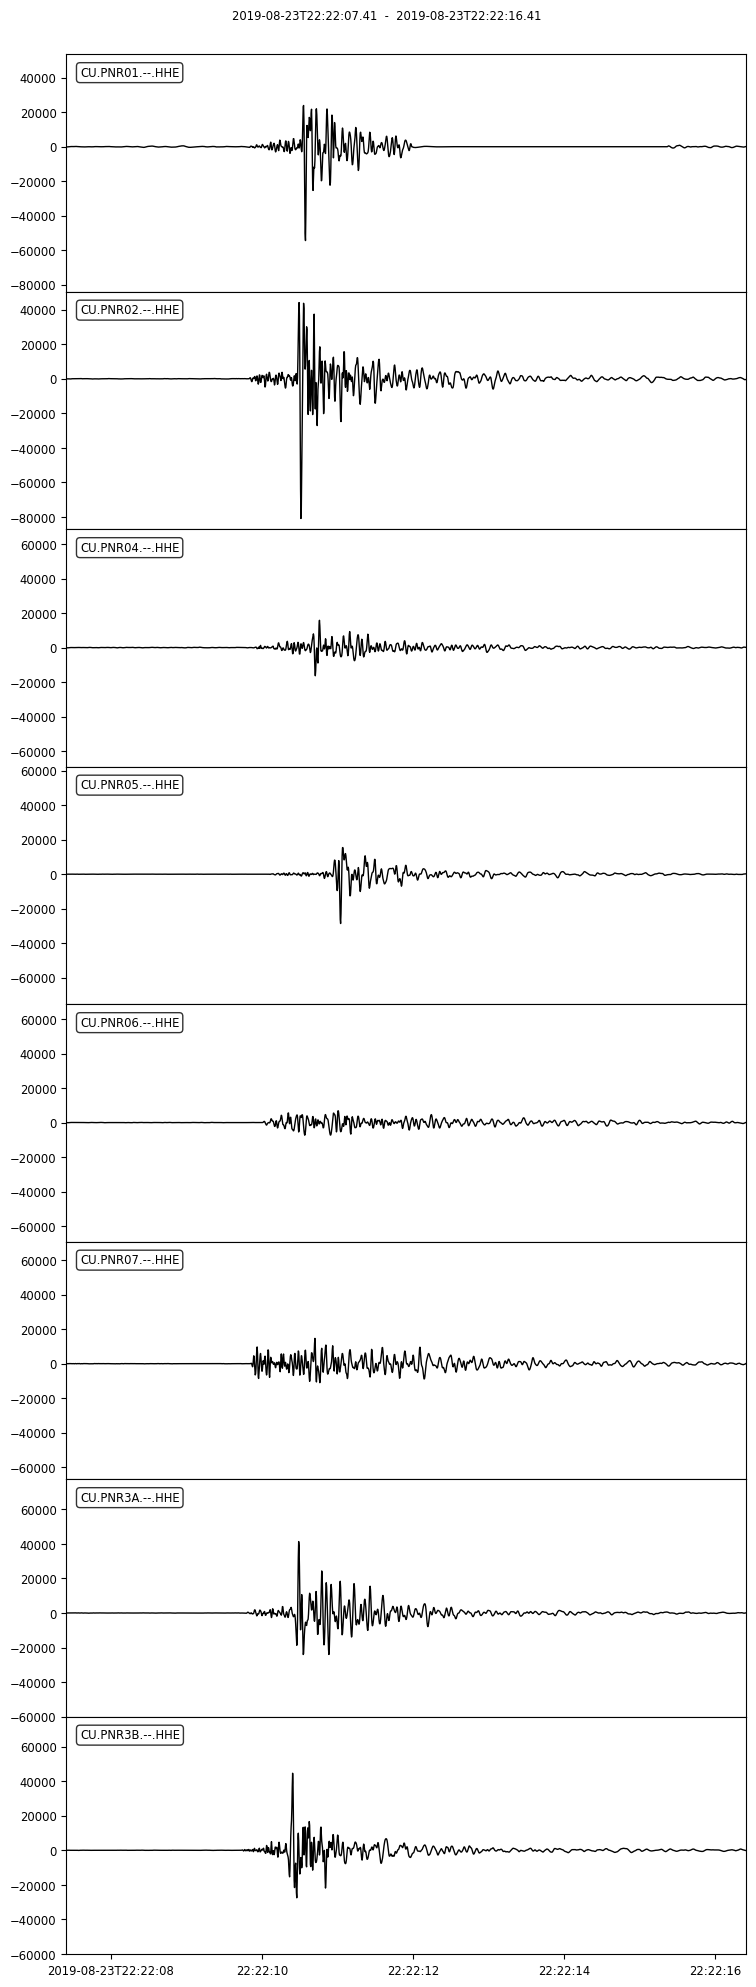

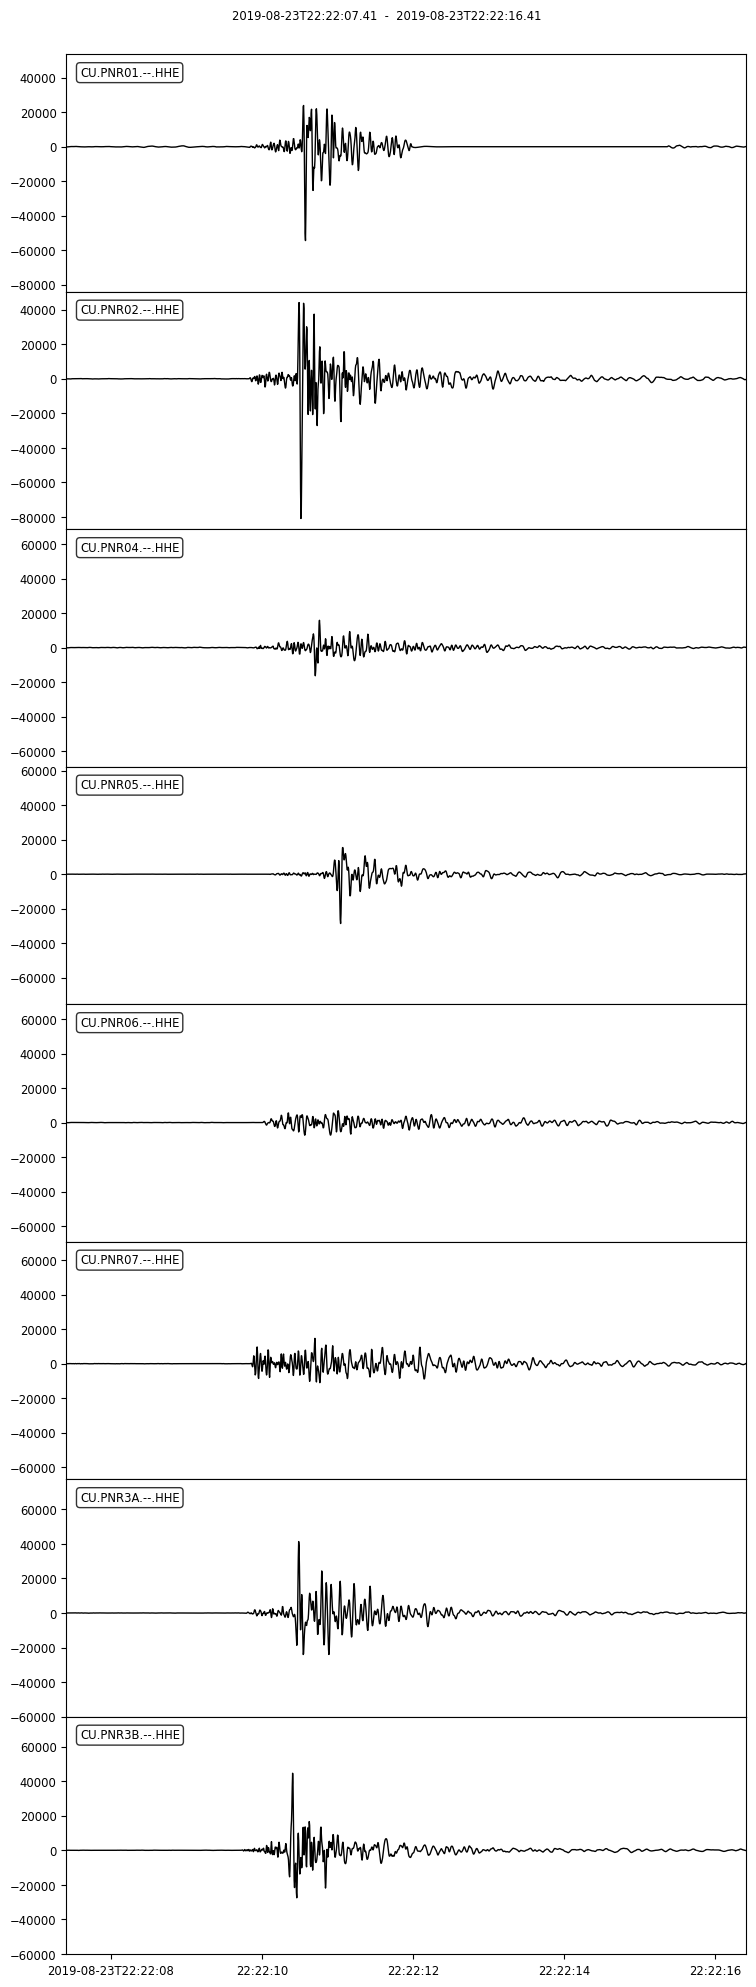

In [142]:
st2.plot(starttime=trig_pd.time[0]-3,endtime=trig_pd.time[0]+6)
# plt.axvline()